<a href="https://colab.research.google.com/github/dheerajjoshim/machinelearningcourse/blob/master/K_Means_ForestType_EDP_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # K-Means Clustering 

In [1]:
# Import necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Upload to Google Colab

from google.colab import files
uploaded = files.upload()

Saving ForestType.csv to ForestType.csv


In [3]:
# Import the dataset

df = pd.read_csv("ForestType.csv")
df.head()

,b1,b2,b3
0,39,36,57
1,84,30,57
2,53,25,49
3,59,26,49
4,57,49,66


In [4]:
# check the dimensioning w.r.t rows and columns

df.shape

(198, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   b1      198 non-null    int64
 1   b2      198 non-null    int64
 2   b3      198 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [6]:
# Check for Null values

df.isnull().sum()

b1    0
b2    0
b3    0
dtype: int64

In [7]:
# have a look on the dataset details

df.describe()

,b1,b2,b3
count,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768
std,12.779563,17.832543,17.314545
min,34.000000,25.000000,47.000000
25%,54.000000,28.000000,52.000000
50%,60.000000,31.500000,57.000000
75%,70.750000,50.750000,69.000000
max,105.000000,160.000000,196.000000


In [8]:
# Outlier check

df[ df['b3'] > 63.676768 + 3*17.314545 ]

,b1,b2,b3
90,81,98,125
93,105,160,196


In [12]:
# Outlier check

df[ df['b1'] > 62.949495 + 3*12.779563 ]

,b1,b2,b3
93,105,160,196


In [13]:
# Outlier check

df[ df['b2'] > 41.020202 + 3*17.832543 ]

,b1,b2,b3
90,81,98,125
93,105,160,196


In [ ]:
# There are some outliers and in K-Means outlier handling might be necessary.
# We will proceed without outlier removal as we are just trying out K-Means and checking the values without 
#   outlier handling.
# Ideally we should try out scaling also as scaling generally works well for K-Means

## # Let's draw a scatter plot of the dataset

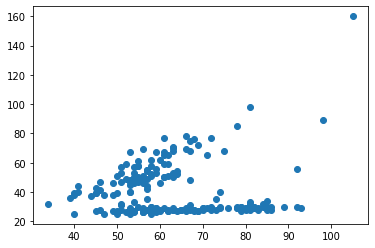

In [14]:
plt.scatter(df.b1,df.b2)
plt.show()

## # K-Means Clustering
### For detail KMean method parameters, please refer https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

In [41]:
# We need to construct 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['b1','b2','b3']])

print(km.cluster_centers_)

[[67.92857143 73.78571429 96.5       ]
 [53.40322581 47.82258065 67.51612903]
 [67.13888889 28.62037037 52.96296296]]


## # Here after fitting data, km.fit_predict return clusters starting from 0,1,2,..n

In [42]:
y_predicted

array([1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2,
       2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1,
       2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2],
      dtype=int32)

In [43]:
km.inertia_

52627.226745178355

## Add column 'cluster' and merge the y_pridicted so that mapping of data and cluster can visualize

In [44]:
df['cluster'] = y_predicted
df.head()

,b1,b2,b3,cluster
0,39,36,57,1
1,84,30,57,2
2,53,25,49,2
3,59,26,49,2
4,57,49,66,1


## We have three clusters, split them into three data frames

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [46]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(28, 4)
(62, 4)
(108, 4)


In [47]:
df2.head()

,b1,b2,b3,cluster
0,39,36,57,1
4,57,49,66,1
7,40,39,58,1
9,51,57,77,1
10,34,32,53,1


## Scatter plot data with three colors showing three clusters

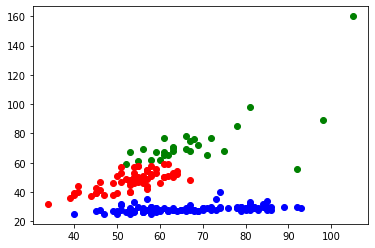

In [54]:
plt.scatter(df1.b1,df1.b2, color='green')
plt.scatter(df2.b1,df2.b2, color='red')
plt.scatter(df3.b1,df3.b2, color='blue')
plt.show()

## End

### # Plot the Elbow curve

In [55]:
X = df    

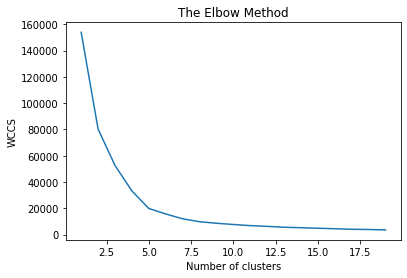

In [62]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCCS')
plt.show()